In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


df = pd.read_csv('sheet1.csv')


X = df['INPUT'].values.astype('U')
y = df['target_new'].values.astype('U')

# print(X[:3])
# print(y[:3])

In [2]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['Input_error'])
 
# printing label
# label

In [3]:
df.drop("Input_error", axis=1, inplace=True)
 
# Appending the array to our dataFrame
# with column name 'Purchased'
df["Category"] = label
 
# printing Dataframe
df

,Unnamed: 0,target_new,INPUT,BART,MARIANMT,BART_error,marianMT_error,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Category
0,0.0,Theatre,Theatre,Theatre,Theatre,Cat A,Cat A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.0,"Today, I'll go to the theatre with my boyfriend.","Today, I'll go to the theatre with my boyfriend.","Today, I'll go to the theatre with my boyfriend.","Today, I'll go to the theatre with my boyfriend.",Cat A,Cat A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2.0,I'm really looking forward to it.,I'm really looking forward to it.,I'm really looking forward to it.,I'm really looking forward to it.,Cat A,Cat A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3.0,I like Verdi.,I like Verdi.,I like Verdi.,I like Verdi.,Cat A,Cat A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4.0,So it's something special for me.,So it's something special for me.,So it's something special for me.,So it's something special for me.,Cat A,Cat A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25734,25734.0,"Thus, it could be more fun and I could better ...","Therefore, It would be more fun and I could co...","Therefore, It would be more fun and I could co...","Therefore, It would be more fun and I could co...",Cat B,Cat B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
25735,25735.0,"Although I ca n't get a scholarship, because i...",Although I ca n't get a scholarship because it...,Although I can't get a scholarship because it ...,Although I can't get a scholarship because it ...,Cat B,Cat B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
25736,25736.0,"By the time I graduate from the university, I'...",By the time I will graduate from the universit...,By the time I will graduate from the universit...,By the time I will graduate from the universit...,Cat B,Cat B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
25737,25737.0,: ) There is no one who does n't have their ow...,: ) There is no one who do n't have their own ...,: ) There is no one who doesn't have their own...,: ) There is no one who don't have their own a...,Cat B,Cat B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

# Stopword removal, converting uppercase into lower case, and lemmatization
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
data_without_stopwords1 = []
data_without_stopwords2 = []
for i in range(0, len(df.target_new)):
    doc = re.sub('[^a-zA-Z]', ' ', df.target_new[i])
    doc1 = re.sub('[^a-zA-Z]', ' ', df.INPUT[i])
    doc = doc.lower()
    doc = doc.split()
    doc1 = doc1.lower()
    doc1 = doc1.split()
    doc = [lemmatizer.lemmatize(word) for word in doc if not word in set(stopwords)]
    doc1 = [lemmatizer.lemmatize(word) for word in doc1 if not word in set(stopwords)]
    doc1 = ' '.join(doc1)
    doc = ' '.join(doc)
    data_without_stopwords1.append(doc)
    data_without_stopwords2.append(doc1)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TypeError: expected string or bytes-like object

In [25]:
# data_without_stopwords1

In [ ]:
df["data_without_stopwords1"] = data_without_stopwords1
df["data_without_stopwords2"] = data_without_stopwords2

In [27]:
df.drop(['target_new','INPUT'], axis = 1, inplace = True)

In [28]:
# print(data.col2[397])

In [29]:
# print(data_without_stopwords2[397])

In [30]:
# import re
# pattern = r'[a-zA-Z]'
# re.sub("ABCD123", pattern)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer() 
# vectors = vectorizer.fit_transform(data_without_stopwords)
df["Merged"] = df[["data_without_stopwords1", "data_without_stopwords2"]].apply(lambda x: "-".join(x), axis =1)

In [32]:
df.drop(["data_without_stopwords1", "data_without_stopwords2"], axis = 1, inplace = True)

In [33]:
tfidf_vectorizer.fit_transform(df["Merged"])

<1070x2192 sparse matrix of type '<class 'numpy.float64'>'
	with 4661 stored elements in Compressed Sparse Row format>

In [34]:
df

,row_word_count,Category,Merged
0,1,0,theatre-theatre
1,9,0,today go theatre boyfriend-today go theatre bo...
2,6,0,really looking forward-really looking forward
3,3,0,like verdi-like verdi
4,6,0,something special-something special
...,...,...,...
1065,5,1,often travel abroad alone-often travel aboroad...
1066,9,1,try buy airplane ticket-try buy airplane tickts
1067,9,1,afraid ca n find something good-afraid ca n fi...
1068,10,1,watched film warnang sorus day ago-watched fil...


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    df['Merged'], df['Category'], test_size=0.25, random_state=42)


# vectorizer = CountVectorizer(
#     analyzer='char', ngram_range=(1, 3), max_features=10000)
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)


In [36]:
x_train_vec = tfidf_vectorizer.fit_transform(X_train)

In [37]:
clf = MLPClassifier(alpha=0.01,
                      batch_size=128,
                      epsilon=1e-08,
                      hidden_layer_sizes=(300,),
                      learning_rate='adaptive',
                      max_iter=500,
                      early_stopping=True,
                      validation_fraction=0.2,
                      solver = 'adam',
                      activation = 'relu')

clf.fit(x_train_vec, y_train)




MLPClassifier(alpha=0.01, batch_size=128, early_stopping=True,
              hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500,
              validation_fraction=0.2)

In [38]:
X_test

644    believe great time improve international exper...
629    heard strong cough felt lazy long time-heard s...
70     went see friend hospital-went see friend hospital
962    really want wife japanese cartoon worshiper-re...
787    breakfast went library studying-breakfirst wen...
                             ...                        
557    stage crowd light disappeared flash-stage crow...
110                          oh take money-oh take money
428                want study english-want study english
852                           moist summer-moisty summer
605    yesterday went see doctor traditional chinese ...
Name: Merged, Length: 268, dtype: object

In [39]:
x_test_vec = tfidf_vectorizer.transform(X_test)
y_pred = clf.predict(x_test_vec)  
y_pred_store = clf.predict(x_train_vec)

In [40]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_pred, y_test)
print(accuracy)

0.5783582089552238


In [41]:
new_accuracy = metrics.accuracy_score(y_pred_store, y_train)
print(new_accuracy)

0.9002493765586035


Text(0, 0.5, 'Loss')

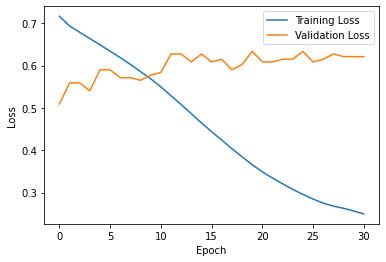

In [42]:
import matplotlib.pyplot as plt
plt.plot(clf.loss_curve_)
plt.plot(clf.validation_scores_)
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

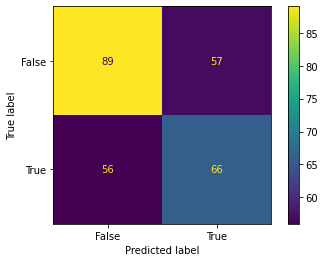

In [43]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [47]:
test_accuracy = metrics.accuracy_score(y_test, y_pred)*100
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1score = metrics.f1_score(y_test, y_pred,average='weighted')

In [48]:
print(test_accuracy)
print(precision)
print(recall)
print(f1score)

57.83582089552238
0.5786462975283382
0.5783582089552238
0.5784942319749872
